# Lab2 数字图像频域增强实验
**Author: Gao Pengbing (nbgao)**  
**Email: nbgao@126.com**

# Work3 灰度和彩色图像的离散余弦变换

## Work3-P1
对输入的灰度和彩色图像进行分块，每一块图像为8*8像素的大小。对分块图像进行离散余弦变换，输出频谱图（DCT系数）

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
def blocks_reshape(blocks):
    n_rows, n_cols = blocks.shape[:2]
    img_reshape = None
    cols = np.zeros((n_rows, 8, 256))
    for i in range(n_rows):
        cols[i] = np.column_stack(blocks[i,:])
    img_reshape = np.row_stack(cols)
    return img_reshape


def DCT(image):
    if(np.ndim(image)==2):
        h, w = image.shape
        n_rows, n_cols = h//8, w//8
        dct_mat = np.zeros((n_rows, n_cols, 8 ,8))
        rows = np.vsplit(image, h/8)
        for i in range(n_rows):
            row = np.hsplit(rows[i], w/8)
            for j in range(n_cols):
                block = row[j]
                dct_mat[i,j] = cv2.dct(block)
                # dct_mat[i,j,abs(dct_mat[i,j])<50] = 0
                # idct_mat[i,j] = np.uint8(cv2.idct(dct_mat[i,j]))
        img_dct = blocks_reshape(dct_mat)
        img_dct = np.log(abs(img_dct))
        return img_dct, dct_mat

    elif(np.ndim(image)==3):
        img_list = [image[:,:,i] for i in range(3)]
        h, w = image.shape[:2]
        n_rows, n_cols = h//8, w//8
        dct_list = [np.zeros((n_rows, n_cols, 8 ,8)) for i in range(3)]
        for c in range(3):
            rows = np.vsplit(img_list[c], h//8)
            for i in range(n_rows):
                row = np.hsplit(rows[i], w/8)
                for j in range(n_cols):
                    block = row[j]
                    dct_list[c][i,j] = cv2.dct(block)
        img_dct = np.zeros_like(image)
        for i in range(3):
            img_dct[:,:,i] = blocks_reshape(dct_list[i])
        img_dct = np.log(abs(img_dct))
        return img_dct, dct_list

In [3]:
def blocks_figure(dct_mat):
    if(np.ndim(dct_mat)==4):
        n_rows, n_cols = np.shape(dct_mat)[:2]
        plt.figure(figsize=(6,6))
        # plt.title('分块频谱图')
        for i in range(n_rows):
            for j in range(n_cols):
                plt.subplot(n_rows, n_cols, i*n_cols+j+1)
                plt.imshow(np.log(np.abs(dct_mat[i,j])), 'gray')
                plt.axis('off')
                
        plt.tight_layout(pad=0.2)
        plt.show()
    elif(np.ndim(dct_mat)==5):
        n_rows, n_cols = np.shape(dct_mat)[1:3]
        dct_new = np.array(dct_mat)
        dct_mat_mean = np.mean(dct_new, axis=0)
        plt.figure(figsize=(6,6))
        for i in range(n_rows):
            for j in range(n_cols):
                plt.subplot(n_rows, n_cols, i*n_cols+j+1)
                plt.imshow(np.log(np.abs(dct_mat_mean[i,j])), 'gray')
                plt.axis('off')
        plt.tight_layout(pad=0.2)
        plt.show()
    return

## Work3-P2
尝试改变部分的DCT系数

## Work3-P3
通过离散余弦逆变换，还原出图像，观察与原图像之间的区别

In [4]:
def IDCT(dct_mat, T=0):
    # 每个分块内DCT系数绝对值小于T的置0
    print('稀疏率：{:.2f}%'.format(np.sum(np.abs(dct_mat)<T)/np.size(dct_mat)*100))

    if(np.ndim(dct_mat)==4):        # 灰度dct分块图
        n_rows, n_cols = np.shape(dct_mat)[:2]
        dct_new = dct_mat.copy()
        idct_mat = np.zeros_like(dct_mat)
        for i in range(n_rows):
            for j in range(n_cols):
                dct_new[i,j,np.abs(dct_new[i,j])<T] = 0
                idct_mat[i,j] = np.uint8(cv2.idct(dct_new[i,j]))
        img_idct = blocks_reshape(idct_mat)
        img_idct = np.uint8(img_idct)
        return img_idct, idct_mat

    elif(np.ndim(dct_mat)==5):      # 彩色dct分块图
        n_rows, n_cols = np.shape(dct_mat)[1:3]
        dct_new = dct_mat.copy()
        idct_mat = np.zeros_like(dct_mat)
        for c in range(3):
            for i in range(n_rows):
                for j in range(n_cols):
                    dct_new[c][i,j,np.abs(dct_new[c][i,j])<T] = 0
                    idct_mat[c][i,j] = np.uint8(cv2.idct(dct_new[c][i,j]))
                    
        img_idct = [blocks_reshape(idct_mat[i]) for i in range(3)]
        img_idct = np.uint8(cv2.merge(img_idct))

        return img_idct, idct_mat

In [5]:
def image_figure(img1, img2):
    if(np.ndim(img1)==2):
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(img1, 'gray')
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(img2, 'gray')
        plt.title('IDCT')
        plt.axis('off')
        plt.show()
    elif(np.ndim(img1)==3):
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(img1)
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(img2)
        plt.title('IDCT')
        plt.axis('off')
        plt.show()

Image1: (256, 256, 3)


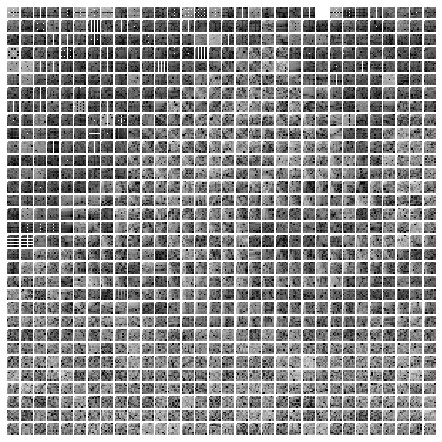

稀疏率：93.39%


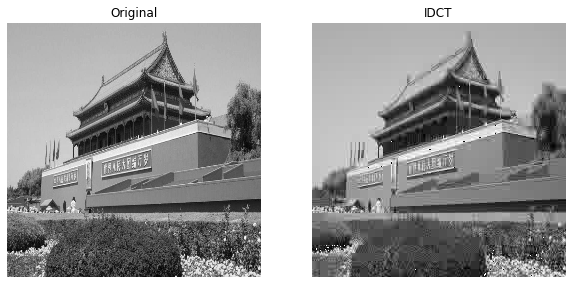

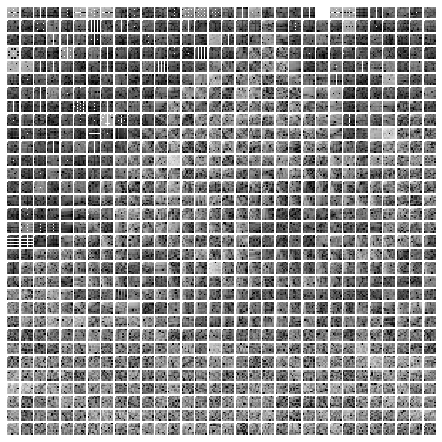

稀疏率：93.30%


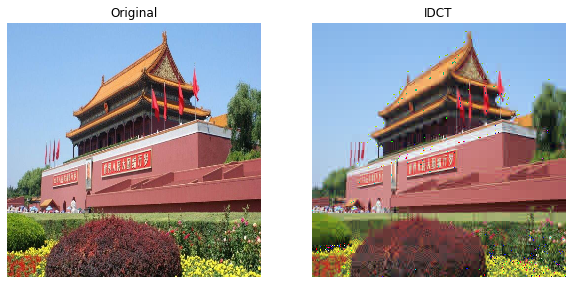

Image2: (256, 256, 3)


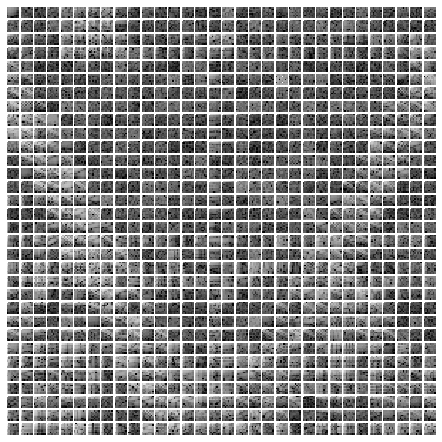

稀疏率：94.88%


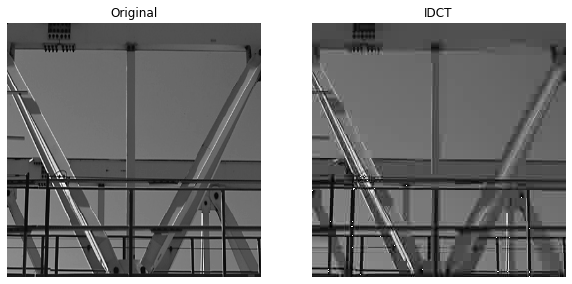

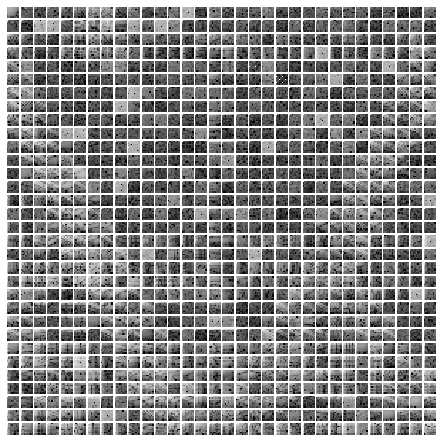

稀疏率：94.25%


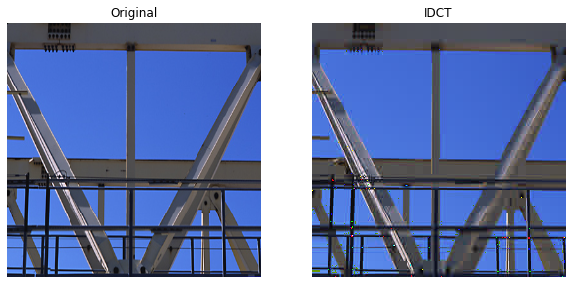

Image3: (256, 256, 3)


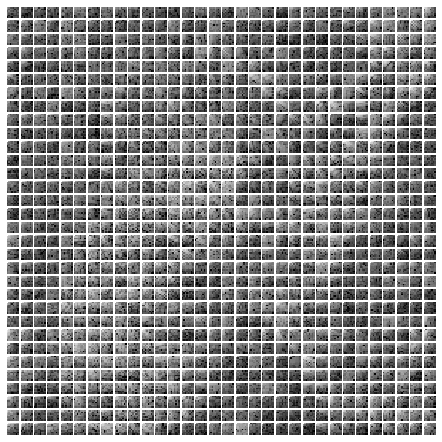

稀疏率：95.98%


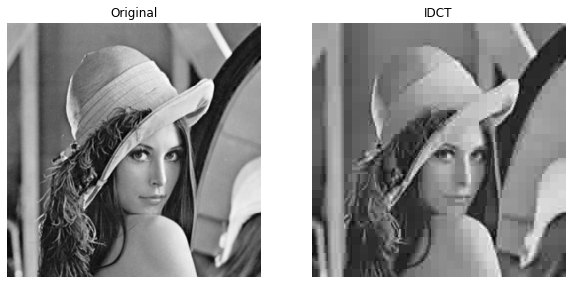

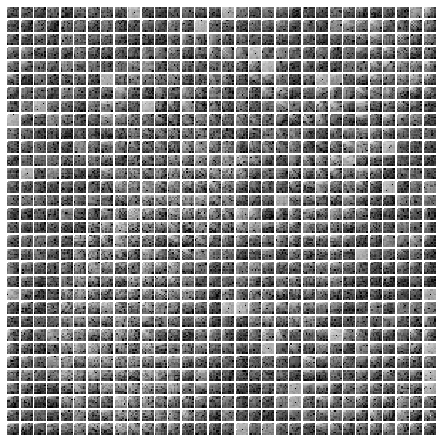

稀疏率：96.12%


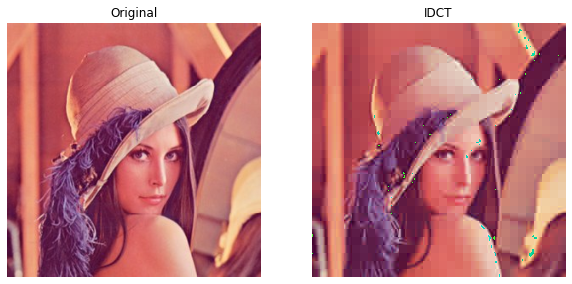

Image4: (256, 256, 3)


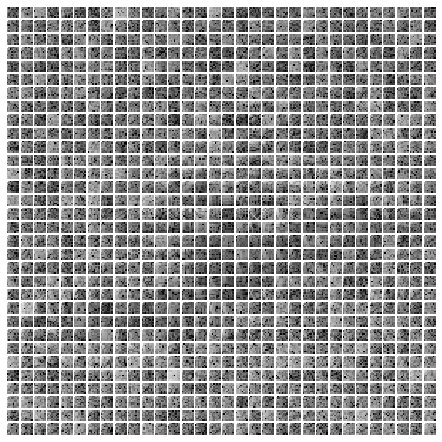

稀疏率：95.22%


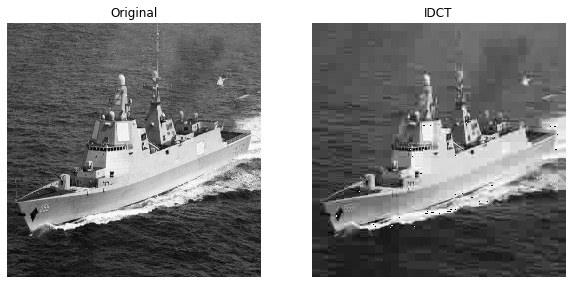

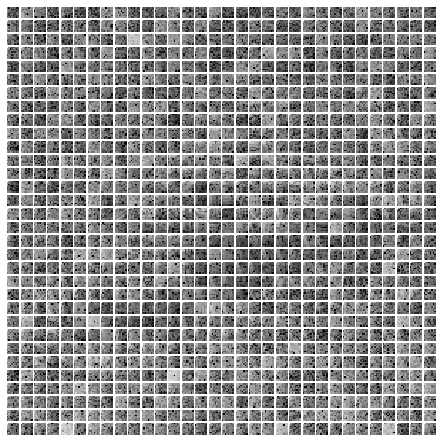

稀疏率：95.20%


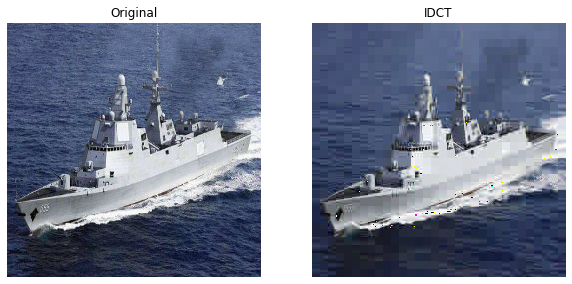

Image5: (256, 256, 3)


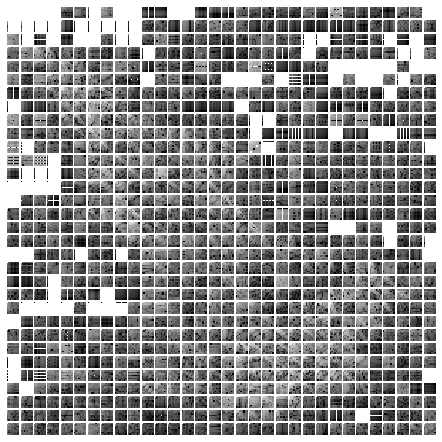

稀疏率：97.06%


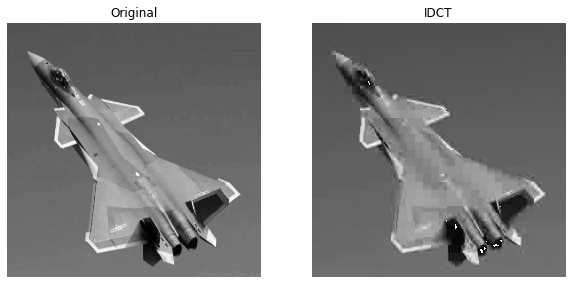

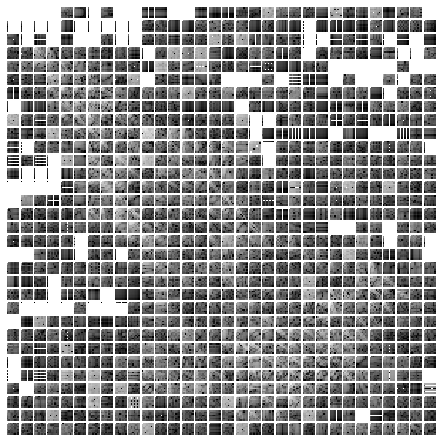

稀疏率：97.06%


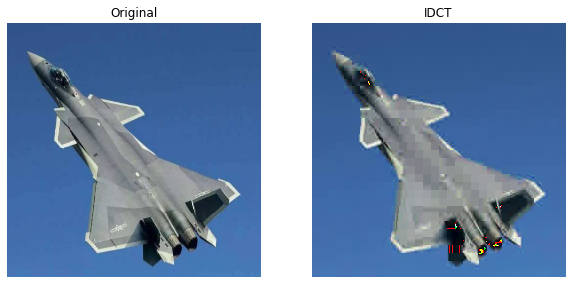

In [7]:
for i in range(1,6):
    file_path = '../Image/image'+str(i)+'.jpg'
    img_bgr = cv2.imread(file_path)
    img_bgr = cv2.resize(img_bgr, (256,256))
    img_bgr = np.float32(img_bgr)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    print('Image{}:'.format(i), img_rgb.shape)

    # 灰度图 DCT IDCT
    img_gray_dct, dct_mat_gray = DCT(img_gray)
    blocks_figure(dct_mat_gray)
    img_gray_idct, idct_mat_gray = IDCT(dct_mat_gray, 50)
    image_figure(img_gray, img_gray_idct)
    
    

    # 彩色图 FFT IFFT
    img_rgb_dct, dct_mat_rgb = DCT(img_rgb)
    blocks_figure(dct_mat_rgb)
    img_rgb_idct, idct_mat_rgb = IDCT(dct_mat_rgb, 50)
    image_figure(np.uint8(img_rgb), img_rgb_idct)
    